In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, places
import xarray as xr
import pandas as pd

%matplotlib inline

#### Example 1: load a time series at one location by accessing netCDF4 files stored on /results or /results2

In [3]:
%%time
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,3,31) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
basedir='/results/SalishSea/nowcast-green.201812/'
nam_fmt='nowcast'
flen=1 # files contain 1 day of data each
ftype= 'ptrc_T' # load bio files
tres=24 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
print(flist)

                                                paths        t_0        t_n
0   /results/SalishSea/nowcast-green.201812/01mar1... 2017-03-01 2017-03-02
1   /results/SalishSea/nowcast-green.201812/02mar1... 2017-03-02 2017-03-03
2   /results/SalishSea/nowcast-green.201812/03mar1... 2017-03-03 2017-03-04
3   /results/SalishSea/nowcast-green.201812/04mar1... 2017-03-04 2017-03-05
4   /results/SalishSea/nowcast-green.201812/05mar1... 2017-03-05 2017-03-06
5   /results/SalishSea/nowcast-green.201812/06mar1... 2017-03-06 2017-03-07
6   /results/SalishSea/nowcast-green.201812/07mar1... 2017-03-07 2017-03-08
7   /results/SalishSea/nowcast-green.201812/08mar1... 2017-03-08 2017-03-09
8   /results/SalishSea/nowcast-green.201812/09mar1... 2017-03-09 2017-03-10
9   /results/SalishSea/nowcast-green.201812/10mar1... 2017-03-10 2017-03-11
10  /results/SalishSea/nowcast-green.201812/11mar1... 2017-03-11 2017-03-12
11  /results/SalishSea/nowcast-green.201812/12mar1... 2017-03-12 2017-03-13
12  /results

In [4]:
# get model i,j of location S3 from places
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level


In [20]:
bio=xr.open_mfdataset(flist['paths'])

In [21]:
bio

<xarray.Dataset>
Dimensions:                       (axis_nbounds: 2, deptht: 40, nvertex: 4, time_counter: 30, x: 398, y: 898)
Coordinates:
    nav_lat                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
    nav_lon                       (y, x) float32 dask.array<chunksize=(898, 398), meta=np.ndarray>
  * deptht                        (deptht) float32 0.5 1.5 2.5 ... 414.5 441.5
    time_centered                 (time_counter) datetime64[ns] dask.array<chunksize=(1,), meta=np.ndarray>
  * time_counter                  (time_counter) datetime64[ns] 2017-03-01T12...
Dimensions without coordinates: axis_nbounds, nvertex, x, y
Data variables:
    bounds_lon                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    bounds_lat                    (time_counter, y, x, nvertex) float32 dask.array<chunksize=(1, 898, 398, 4), meta=np.ndarray>
    area                          (time_counter, y, x) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    deptht_bounds                 (time_counter, deptht, axis_nbounds) float32 dask.array<chunksize=(1, 40, 2), meta=np.ndarray>
    nitrate                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    time_centered_bounds          (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    time_counter_bounds           (time_counter, axis_nbounds) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    ammonium                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    silicon                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    diatoms                       (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    flagellates                   (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    ciliates                      (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    microzooplankton              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_organic_nitrogen    (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    particulate_organic_nitrogen  (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    biogenic_silicon              (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    Fraser_tracer                 (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    mesozooplankton               (time_counter, deptht, y, x) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSea_1d_20170301_20170310
    description:  biogeochemical variables
    title:        biogeochemical variables
    Conventions:  CF-1.6
    timeStamp:    2019-Jan-11 10:18:36 GMT
    uuid:         8082bc6c-e5cf-46f8-a8ce-8e6f05c20614

In [22]:
%%time
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=ik,y=ij,x=ii)
diat=bio.diatoms.isel(deptht=ik,y=ij,x=ii)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.28 ms


CPU times: user 8.37 s, sys: 1.24 s, total: 9.61 s
Wall time: 17 s


(17226.5, 17255.5)

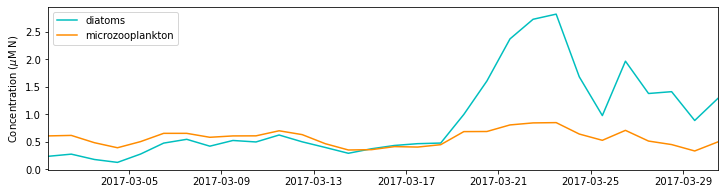

In [23]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

Text(0.5, 1.0, 'March 2017')

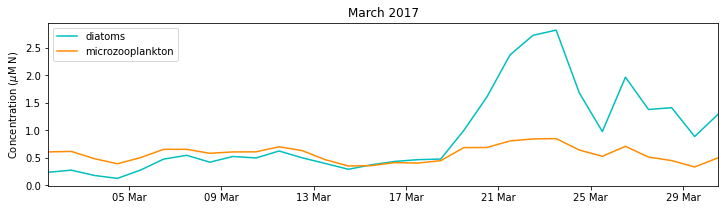

In [24]:
# Adjust date format display
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])
yearsFmt = mdates.DateFormatter('%d %b')
ax.xaxis.set_major_formatter(yearsFmt)
ax.set_title('March 2017')

In [25]:
bio.close()

### repeat with hourly data over a shorter interval

In [26]:
start= dt.datetime(2017,3,1)
end=dt.datetime(2017,3,5) # the code called below (evaltools.index_model_files) includes the end date 
                          # in the values returned
tres=1 # 1: hourly resolution; 24: daily resolution   <- try changing to 1 and loading hourly data
flist=et.index_model_files(start,end,basedir,nam_fmt,flen,ftype,tres)
# flist contains paths: file pathes; t_0 timestemp of start of each file; t_n: timestamp of start of next file
flist['paths'][0]

'/results/SalishSea/nowcast-green.201812/01mar17/SalishSea_1h_20170301_20170301_ptrc_T.nc'

In [27]:
%%time
bio=xr.open_mfdataset(flist['paths'])
tt=bio.time_centered
micZ=bio.microzooplankton.isel(deptht=0,y=ij,x=ii)
diat=bio.diatoms.isel(deptht=0,y=ij,x=ii)

CPU times: user 216 ms, sys: 96 ms, total: 312 ms
Wall time: 831 ms


CPU times: user 26 s, sys: 4.38 s, total: 30.4 s
Wall time: 31.7 s


(17226.020833333332, 17229.979166666668)

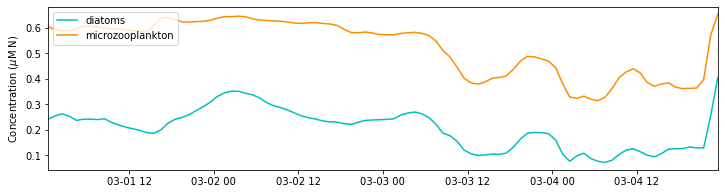

In [28]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(tt,diat,'c-',label='diatoms')
ax.plot(tt,micZ,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(tt[0],tt[-1])

In [29]:
bio.close()

### Aside: this can also be done using ERDDAP, but only to access 201905 model output

In [6]:
# Now we are actually loading everything from a website/ online database instead of from our own results storage.
hc1905 = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCTWDP1mV18-01')

In [7]:
%%time
hc1905

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.53 µs


<xarray.Dataset>
Dimensions:                                      (s: 3871184)
Dimensions without coordinates: s
Data variables:
    s.time                                       (s) datetime64[ns] ...
    s.longitude                                  (s) float64 ...
    s.latitude                                   (s) float64 ...
    s.on_crossing_mask                           (s) bool ...
    s.crossing_number                            (s) float64 ...
    s.temperature                                (s) float64 ...
    s.temperature_std_dev                        (s) float64 ...
    s.temperature_sample_count                   (s) float64 ...
    s.conductivity                               (s) float64 ...
    s.conductivity_std_dev                       (s) float64 ...
    s.conductivity_sample_count                  (s) float64 ...
    s.salinity                                   (s) float64 ...
    s.salinity_std_dev                           (s) float64 ...
    s.salinity_sample_count                      (s) float64 ...
    s.o2_saturation                              (s) float64 ...
    s.o2_saturation_std_dev                      (s) float64 ...
    s.o2_saturation_sample_count                 (s) float64 ...
    s.o2_concentration_corrected                 (s) float64 ...
    s.o2_concentration_corrected_std_dev         (s) float64 ...
    s.o2_concentration_corrected_sample_count    (s) float64 ...
    s.o2_temperature                             (s) float64 ...
    s.o2_temperature_std_dev                     (s) float64 ...
    s.o2_temperature_sample_count                (s) float64 ...
    s.cdom_fluorescence                          (s) float64 ...
    s.cdom_fluorescence_std_dev                  (s) float64 ...
    s.cdom_fluorescence_sample_count             (s) float64 ...
    s.chlorophyll                                (s) float64 ...
    s.chlorophyll_std_dev                        (s) float64 ...
    s.chlorophyll_sample_count                   (s) float64 ...
    s.turbidity                                  (s) float64 ...
    s.turbidity_std_dev                          (s) float64 ...
    s.turbidity_sample_count                     (s) float64 ...
    s.co2_partial_pressure                       (s) float64 ...
    s.co2_partial_pressure_std_dev               (s) float64 ...
    s.co2_partial_pressure_sample_count          (s) float64 ...
    s.co2_concentration_linearized               (s) float64 ...
    s.co2_concentration_linearized_std_dev       (s) float64 ...
    s.co2_concentration_linearized_sample_count  (s) float64 ...
    s.air_temperature                            (s) float64 ...
    s.air_temperature_std_dev                    (s) float64 ...
    s.air_temperature_sample_count               (s) float64 ...
    s.relative_humidity                          (s) float64 ...
    s.relative_humidity_std_dev                  (s) float64 ...
    s.relative_humidity_sample_count             (s) float64 ...
    s.barometric_pressure                        (s) float64 ...
    s.barometric_pressure_std_dev                (s) float64 ...
    s.barometric_pressure_sample_count           (s) float64 ...
    s.solar_radiation                            (s) float64 ...
    s.solar_radiation_std_dev                    (s) float64 ...
    s.solar_radiation_sample_count               (s) float64 ...
    s.longwave_radiation                         (s) float64 ...
    s.longwave_radiation_std_dev                 (s) float64 ...
    s.longwave_radiation_sample_count            (s) float64 ...
Attributes:
    acknowledgement:           MEOPAR, ONC
    cdm_data_type:             TimeSeries
    cdm_timeseries_variables:  longitude, latitude, on_crossing_mask, crossin...
    Conventions:               COARDS, CF-1.6, ACDD-1.3
    creator_email:             sallen@eos.ubc.ca
    creator_name:              Salish Sea MEOPAR Project Contributors
    creator_url:               https://salishsea-meopar-docs.readthed

In [32]:
%%time
modt=hc1905.time.sel(time=slice(start,end))
micZ1905=hc1905.microzooplankton.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)
diat1905=hc1905.diatoms.sel(time=slice(start,end)).isel(depth=ik,gridY=ij,gridX=ii)

CPU times: user 12 ms, sys: 0 ns, total: 12 ms
Wall time: 9.27 ms


CPU times: user 24 ms, sys: 8 ms, total: 32 ms
Wall time: 5min 35s


(17226.020833333332, 17229.979166666668)

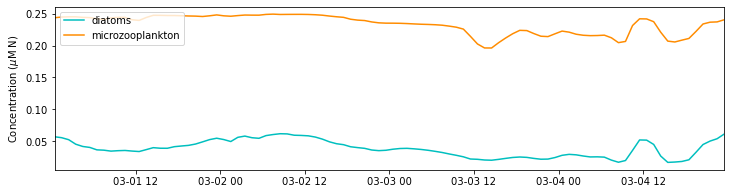

In [33]:
%%time
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(modt,diat1905,'c-',label='diatoms')
ax.plot(modt,micZ1905,'-',color='darkorange',label='microzooplankton')
ax.legend(loc=2);
ax.set_ylabel('Concentration ($\mu$M N)')
ax.set_xlim(modt[0],modt[-1]);

In [34]:
hc1905.close()

## back to accessing files from /results and /results2, but now switch to loading 201905 results

In [35]:
basedir='/results2/SalishSea/nowcast-green.201905/'

## Plot mid Feb -- Jun Surface phytoplankton and nitrate at S3 for 2017:

In [36]:
newstart=dt.datetime(2017,2,15)
newend=dt.datetime(2017,6,1)
flist=et.index_model_files(newstart,newend,basedir,'nowcast',1,'ptrc_T',1)
bio2=xr.open_mfdataset(flist['paths'])
ij,ii=places.PLACES['S3']['NEMO grid ji']
ik=0 # choose surface level

Text(0, 0.5, '$\\mu$M N')

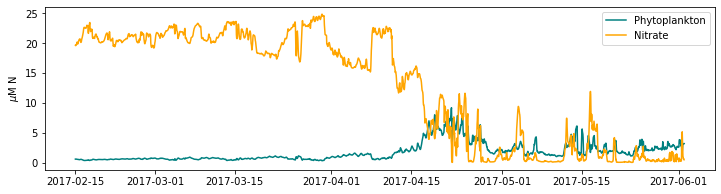

In [22]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
p1=ax.plot(bio2.time_centered,bio2.diatoms.isel(deptht=ik,y=ij,x=ii)+\
        bio2.flagellates.isel(deptht=ik,y=ij,x=ii)+bio2.ciliates.isel(deptht=ik,y=ij,x=ii),
           '-',color='teal',label='Phytoplankton')
p2=ax.plot(bio2.time_centered,bio2.nitrate.isel(deptht=ik,y=ij,x=ii),
           '-',color='orange',label='Nitrate')
ax.legend(handles=[p1[0],p2[0]],loc=1)
ax.set_ylabel('$\mu$M N')

## Fraser River flow for same times

In [ ]:
dfFra=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/Flow/FraserHopeDaily__Dec-2-2020_10_31_05PM.csv', #hope is the name of the upstream place that collects this data.
                  skiprows=1)
# the original file contains both flow and water level information in the same field (Value)
# keep only the flow data, where PARAM=1 (drop PARAM=2 values)
# flow units are m3/s
dfFra.drop(dfFra.loc[dfFra.PARAM==2].index,inplace=True)  

In [ ]:
# rename 'Value' column to 'Flow' now that we have removed all the water level rows
dfFra.rename(columns={'Value':'Flow'}, inplace=True)

In [ ]:
dfFra #just ignore SYM.

In [ ]:
# no time information so use dt.date
dfFra['Date']=[dt.date(iyr,1,1)+dt.timedelta(days=idd-1) for iyr, idd in zip(dfFra['YEAR'],dfFra['DD'])]

In [ ]:
dfFra.head(2)

In [ ]:
# select portion of dataframe in desired date range
dfFra2=dfFra.loc[(dfFra.Date>=newstart.date())&(dfFra.Date<=newend.date())]

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(12,3))
ax.plot(dfFra2['Date'],dfFra2['Flow'],'c-')
ax.set_ylabel(f'Flow')
ax.set_title('Fraser Flow at Hope')